In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
df = pd.read_csv('F:\\Down\\disney_plus_titles.csv')

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [4]:
df.shape

(1450, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


Data Transformation

In [ ]:
# Creating new columns from existing column
df[['g1','g2','g3']] = df['listed_in'].str.split(',', expand = True)

Data Reduction

In [ ]:
# Removing unnecessary columns
df.drop(['show_id', 'description', 'listed_in'], axis = 1 ,inplace = True)

Data Cleaning

In [7]:
# Checking for null values
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
g1                0
g2               64
g3              376
dtype: int64

In [8]:
# Flling null values
df['director'] = df['director'].fillna('without director reference')
df['director'].isnull().sum()

np.int64(0)

In [9]:
df['cast'] = df['cast'].fillna('without cast reference')
df['cast'].isnull().sum()

np.int64(0)

In [10]:
df['country'] = df['country'].fillna('without country reference')
df['country'].isnull().sum()


np.int64(0)

In [11]:
df['rating'] = df['rating'].fillna('without rating')
df['rating'].isnull().sum()

np.int64(0)

In [15]:
# Filling null values 
df.fillna(0, inplace = True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
g1              0
g2              0
g3              0
dtype: int64

In [16]:
# Checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [14]:
# Checking for duplicated values
df.duplicated().sum()

np.int64(0)

Data Visualization

Questions to be answered-

1. Which year of 20s released more numbers of Movies/TV Shows?
2. Show the difference in Movies released and TV Shows released of top 3 year of 20s having the most released.
3. What are the total number of movies and tv shows released?
4. Which year of 20s has released the most Action-Adventure movies/tv shows?
5. Which category of rating has the most number of releases?

Que 1. Which year of 20s released more numbers of Movies/TV Shows?

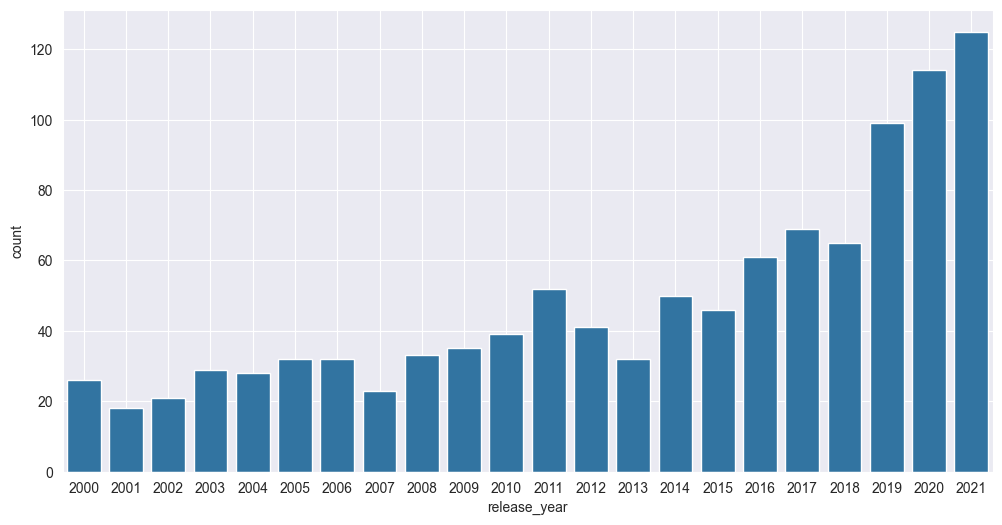

In [19]:
ans1 = df.query('release_year >= 2000')
plt.figure(figsize = (12,6))
sns.set_style('dark')
sns.countplot(ans1, x = 'release_year')
plt.grid(True)
plt.show()

Answer-

2020 from 20s released the hightest number of shows.

Que 2. Show the difference in Movies released and TV Shows released of top 3 year of 20s having the most released.



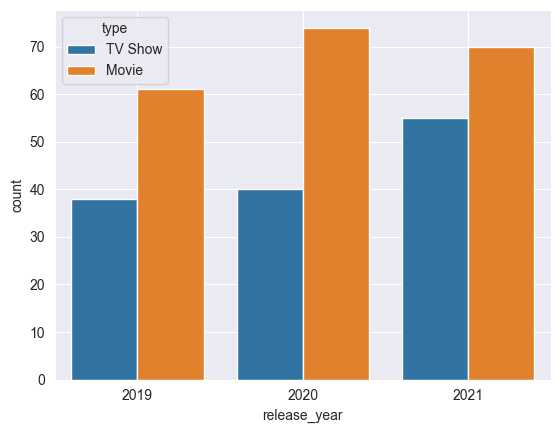

In [20]:
ans2 = df.query('release_year == [2020,2021,2019]')
sns.countplot(ans2, x = 'release_year', hue = 'type')
plt.grid(True)
plt.show()

Answer-

Showing the difference between Movies released and TV Shows released of 2019, 2020 and 2021.


Que 3. What are the total number of movies and tv shows released?



In [21]:
ans3 = df['type'].value_counts()
ans3

type
Movie      1052
TV Show     398
Name: count, dtype: int64

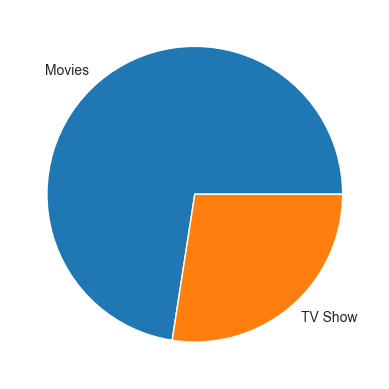

In [22]:
plt.pie(ans3, labels = ['Movies', 'TV Show'])
plt.show()

Answer-

Total number of Movie released is 991

Total number of TV Shows released is 377

Que 4. Which year of 20s has released the most Action-Adventure movies/tv shows?



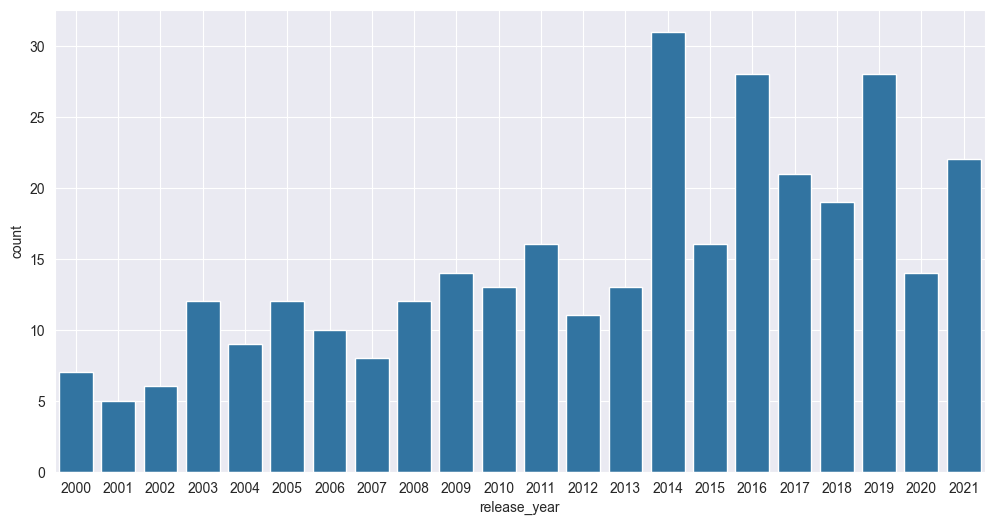

In [24]:
acad = df.query("release_year >= 2000 and g1 == 'Action-Adventure'  or g2 == 'Action-Adventure' or g3 == 'Action-Adventure'")
plt.figure(figsize = (12,6))
sns.countplot(acad, x = 'release_year')
plt.grid(True)
plt.show()

Answer-

2014 from 20s has released the most number of Action-Adventure movies/shows.

Que 5. Which category of rating has the most number of releases?



In [25]:
ans5 = df['rating'].value_counts()
ans5

rating
TV-G              318
TV-PG             301
G                 253
PG                236
TV-Y7             131
TV-14              79
PG-13              66
TV-Y               50
TV-Y7-FV           13
without rating      3
Name: count, dtype: int64

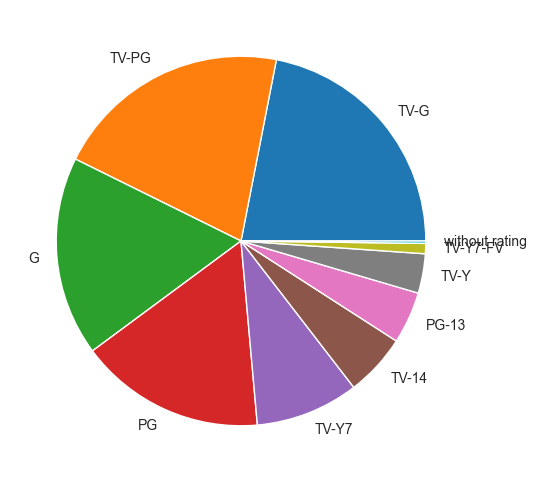

In [27]:
plt.figure(figsize = (6,6))
plt.pie(ans5, labels = ['TV-G', 'TV-PG', 'G', 'PG', 'TV-Y7', 'TV-14', 'PG-13', 'TV-Y', 'TV-Y7-FV', 'without rating'])
plt.show()

Answer

TV-G has the most number of releases viz 307.